### Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the data

In [16]:
data = pd.read_csv('daily-total-female-births.csv', index_col=[0], parse_dates=[0])

### Top 5 rows

In [17]:
data.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


### Last 5 rows

In [25]:
data.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


### Statistical Information about the data

In [26]:
data.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


### Dataframe Shape

In [18]:
data.shape

(365, 1)

In [21]:
birth_values = data.values

### Plot

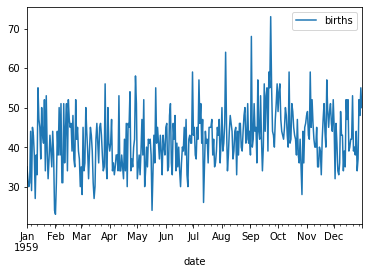

In [27]:
data.plot()
plt.show()

In [28]:
data['births'].max()

73

In [29]:
data['births'].min()

23

### Histogram

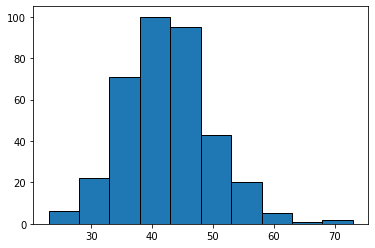

In [31]:
plt.hist(data['births'], edgecolor='black')
plt.show()

### Moving Average

In [35]:
data_mean = data.rolling(window=30).mean()

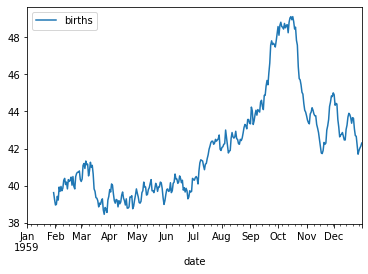

In [36]:
data_mean.plot()
plt.show()

## 1. `Baseline Model`

In [37]:
birth_df = pd.concat([data['births'], data['births'].shift(1)], axis=1)

In [38]:
birth_df.head()

,births,births
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [44]:
birth_df.columns = ['actual_birth','predicted_birth']

In [45]:
birth_df.head()

,actual_birth,predicted_birth
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
birth_test = birth_df[1:]

In [51]:
birth_test.head()

,actual_birth,predicted_birth
date,,
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0
1959-01-06,29,44.0


### Mean Squared Error

In [48]:
birth_error = mean_squared_error(birth_test.actual_birth, birth_test.predicted_birth)

In [50]:
print(birth_error)

84.22252747252747


### Root Mean Squared Error

In [52]:
print(np.sqrt(birth_error))

9.177283229394606


## 2. `ARIMA` (Autoregressive(p) Integrated(d) Moving Average(q))

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### acf

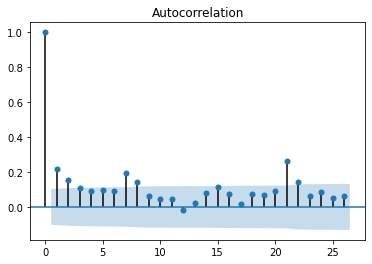

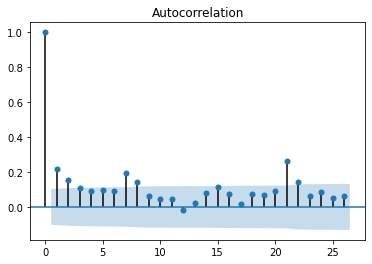

In [56]:
plot_acf(data) #identify q value

### pacf

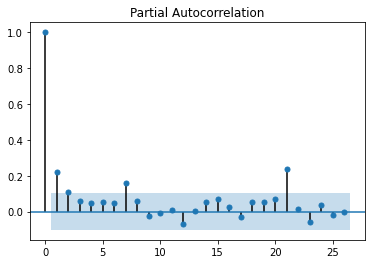

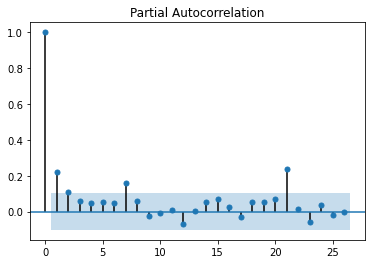

In [57]:
plot_pacf(data) # to identify p value

In [66]:
birth_train = data[1:330]
birth_test = data[330:365]

In [67]:
print(birth_train.size, birth_test.size)

329 35


In [68]:
from statsmodels.tsa.arima_model import ARIMA

In [86]:
birth_model = ARIMA(birth_train, order=(2,1,3))

c:\users\satya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\satya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [87]:
birth_model_fit = birth_model.fit()

In [88]:
birth_predict = birth_model_fit.forecast(steps=35)[0]

### Model Evaluation

In [89]:
print(mean_squared_error(birth_test, birth_predict))

46.999775249061024


In [90]:
print(np.sqrt(mean_squared_error(birth_test, birth_predict)))

6.855638208734547
